<h1 align="center">Wavelets</h1>

    Jonathan Merrill

In [1]:
from scipy.signal import fftconvolve
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
import pywt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,8]

A function that calculates the discrete wavelet transform.
Returns a list of one-dimensional NumPy arrays in the form: $[A_n,D_n,...,D_1]$.

Plots the signal of the sine wave given in the problem statement with the approximation and detail coefficients.

In [24]:
def dwt(X, L, H, n):
    """Compute the discrete wavelet transform in one dimension using the Haar 
    wavelet filters.
    
    Parameters:
        X ((m, ) ndarray): A vector of length m on which to perform the 
            wavelet transform.
        L ((2, ) ndarray): Haar father low-pass decomposition filter.
        H ((2, ) ndarray): Haar father high-pass decomposition filter.
        n (int): The number of filter passes to perform.
        
    Returns:
        (list): A list of arrays of length n+1 consisting of the approximation
            coefficients followed by the successive levels of detail
            coefficients.
    """
    A = X
    return_list = []
    for i in range(0,n):
        D = fftconvolve(A,H)[1::2]     #set and adjust the D array
        A = fftconvolve(A,L)[1::2]     #adjust the A array
        return_list.insert(0,D)        #add the resulting D array to the list
    return_list.insert(0,A)            #add the A array to the list
    return return_list                 #return the resulting list

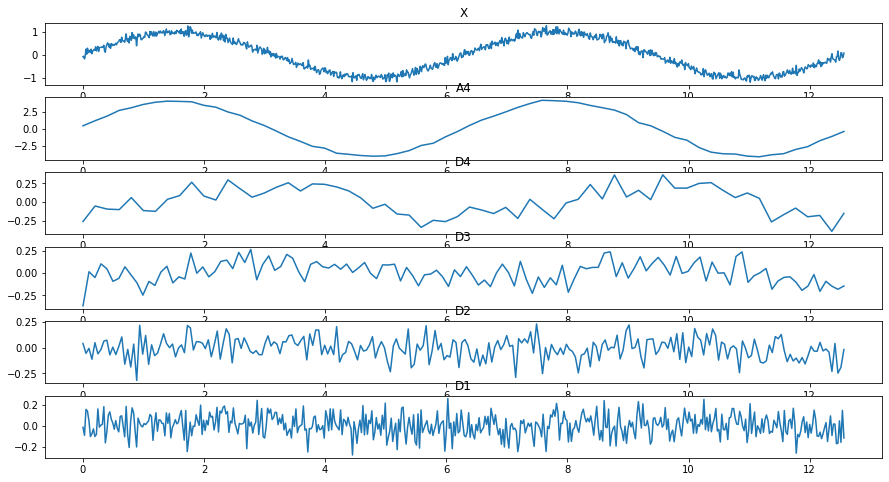

In [25]:
# Make a noisy sine wave and compute its discrete wavelet transform
# Plot the resulting coefficients.

#Take the dwt with the given L and H
domain = np.linspace(0, 4*np.pi, 1024)
noise = np.random.randn(1024)*.1
noisysin = np.sin(domain) + noise
L = [np.sqrt(2)/2,np.sqrt(2)/2]
H = [-np.sqrt(2)/2,np.sqrt(2)/2]
coeffs = dwt(noisysin, L, H, 4)

#plot the original X randomized wave
A1 = plt.subplot(611)
A1.plot(domain,noisysin)
A1.title.set_text('X')

#plot the A array after one iteration 
domain2 = np.linspace(0,4*np.pi,len(coeffs[0]))
A2 = plt.subplot(612)
A2.plot(domain2,coeffs[0])
A2.title.set_text('A4')

#plot D4
domain3 = np.linspace(0,4*np.pi,len(coeffs[1]))
A3 = plt.subplot(613)
A3.plot(domain3,coeffs[1])
A3.title.set_text('D4')

#plot D3
domain4 = np.linspace(0,4*np.pi,len(coeffs[2]))
A4 = plt.subplot(614)
A4.plot(domain4,coeffs[2])
A4.title.set_text('D3')

#plot D2
domain5 = np.linspace(0,4*np.pi,len(coeffs[3]))
A5 = plt.subplot(615)
A5.plot(domain5,coeffs[3])
A5.title.set_text('D2')

#plot D1
domain6 = np.linspace(0,4*np.pi,len(coeffs[4]))
A6 = plt.subplot(616)
A6.plot(domain6,coeffs[4])
A6.title.set_text('D1')

A function that performs the inverse wavelet transform.
Returns a single array, which represents the recovered single.

Compare the original signal with the signal recovered by the inverse wavelet transform.

In [26]:
def idwt(X, L, H):
    """Compute the inverse discrete wavelet transform in one dimension
    using the detail and approximation coefficients computed by the 
    discrete wavelet transform. This function works with the inverse Haar 
    wavelet filters.
    
    Parameters:
        X (list): A list of length m which contains ndarrays, should match
            the output of dwt().
        L ((2, ) ndarray): Haar father low pass reconstruction filter.
        H ((2, ) ndarray): Haar father high pass reconstruction filter.
        
    Returns:
        ((m, ) ndarray): The reconstructed 1-D array.
    """
    m = len(X)
    A = X[0]
    for i in range(0,m-1):
        D = X[i+1]
        up_A = np.zeros(2*A.size)   #unsample A and D
        up_A[::2] = A
        up_D = np.zeros(2*D.size)
        up_D[::2] = D
        A = fftconvolve(up_A, L)[:-1] + fftconvolve(up_D, H)[:-1]  #Convolve and add, discarding the last entry
    return A    #return back A, which is now the original vector

In [27]:
# Compute the idwt of the noisy sine wave
# Then check that it matches the original signal using np.allclose()

#generate the original dwt
domain = np.linspace(0, 4*np.pi, 1024)
noise = np.random.randn(1024)*.1
noisysin = np.sin(domain) + noise
L = [np.sqrt(2)/2,np.sqrt(2)/2]
H = [-np.sqrt(2)/2,np.sqrt(2)/2]
coeffs = dwt(noisysin, L, H, 4)

#use the inverse function and the new H and L to find the inverse dwt
H = [np.sqrt(2)/2,-np.sqrt(2)/2]
inverse = idwt(coeffs,L,H)
print(np.allclose(inverse,noisysin))  #will return True if the inverse is the same as the original

True


Save a picture of a raccoon. Plot the subbands of raccoon as described using the Daubechies 4 wavelet.

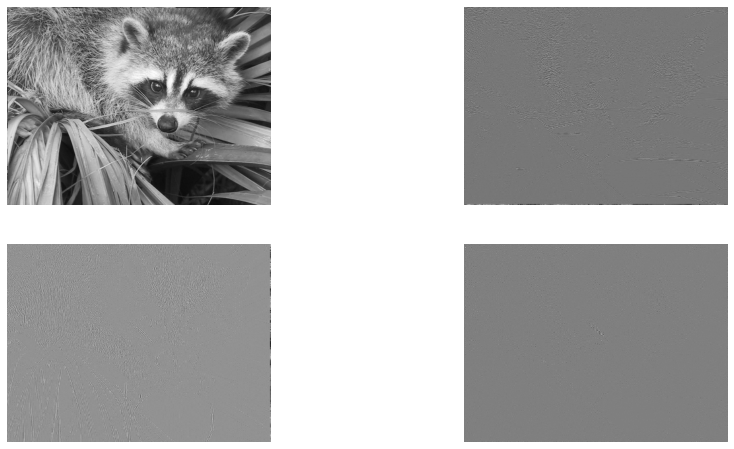

In [28]:
# Plot the first level of approximation and detail coefficients for the woman_darkhair image using the Daubechies 4 wavelet.

#get the racoon image
from scipy.misc import face
racoon = face(True)
lw = pywt.dwt2(racoon, 'db4', mode = 'per')

#plot the subbands of the racoon image
A1 = plt.subplot(221)
A1.imshow(lw[0], cmap = "gray")         #LL
A1.axis('off')

A2 = plt.subplot(222)
A2.imshow(lw[1][0],cmap = "gray")       #LH
A2.axis('off')

A3 = plt.subplot(223)
A3.imshow(lw[1][1],cmap = "gray")       #HL
A3.axis('off')

A4 = plt.subplot(224)
A4.imshow(lw[1][2],cmap = "gray")       #HH
A4.axis('off')

plt.show()

Compare the subband patterns of the haar, symlet, and coiflet wavelets by plotting the LH subband pattern using the picture of the raccoon.

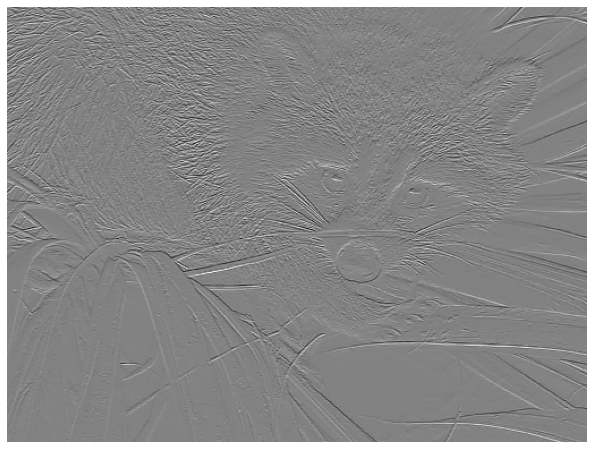

In [29]:
# Plot LH (after 1 level of decomposition) using the Haar wavelet.
from scipy.misc import face
racoon = face(True)
lw = pywt.dwt2(racoon, 'haar', mode = 'per')
plt.imshow(lw[1][0],cmap = "gray")
plt.axis('off')
plt.show()

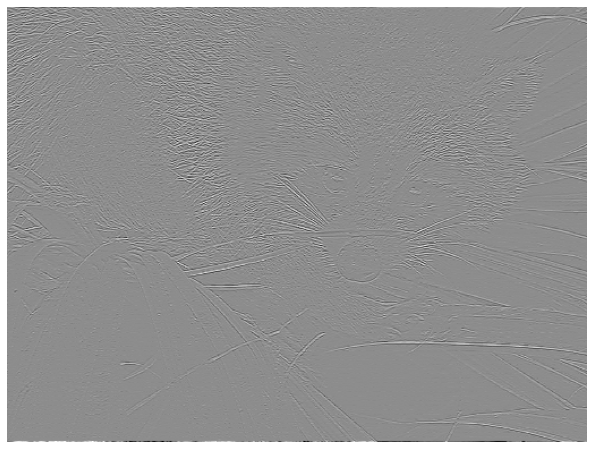

In [30]:
# Plot LH (after 1 level of decomposition) using the Symlet wavelet.
from scipy.misc import face
racoon = face(True)
lw = pywt.dwt2(racoon, 'sym2', mode = 'per')
plt.imshow(lw[1][0],cmap = "gray")
plt.axis('off')
plt.show()

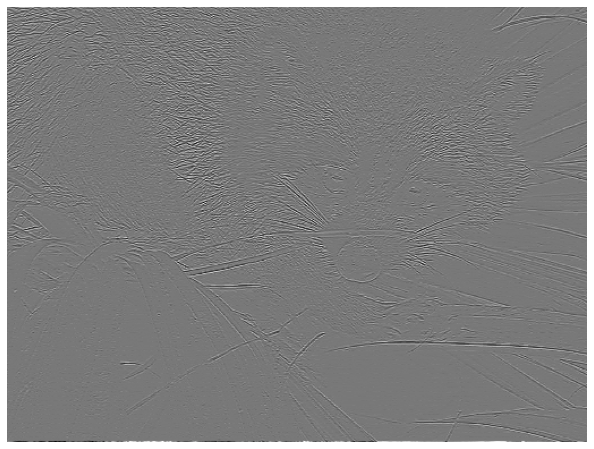

In [31]:
# Plot LH (after 1 level of decomposition) using the Coiflet wavelet.
from scipy.misc import face
racoon = face(True)
lw = pywt.dwt2(racoon, 'coif1', mode = 'per')
plt.imshow(lw[1][0],cmap = "gray")
plt.axis('off')
plt.show()

Two functions, one which performs hard thresholding and the second performs soft thresholding.

Perform hard and soft thresholding on noisy_darkhair.png and plot the resulting images together. Use the Daubechies 4 wavelets. For soft thresholding use $\tau=20$ and for hard thresholding use $\tau=40$.

In [32]:
def hard_threshold(coeffs, tau):
    """Clean the wavelet decomposition of an image using the hard
    thresholding technique, which sets all detail coefficients whose
    absolute value is less than tau to 0.
    
    Parameters:
        coeffs (list): A list of 2-D ndarrays in the form returned by
            pywt.wavedec2() (and other similar functions).
        tau (float): Threshold value.
        
    Returns:
        (list): A list of processed 2-D ndarrays in the same form as coeffs.
    """
    for i in range(1,len(coeffs)):
        for j in range(0,2):
            coeffs[i][j][abs(coeffs[i][j]) < tau] = 0   #if the absolute value of the values of the matrix coeffs[i][j] are less than tau, they will be set to 0 
    return coeffs 
    #raise NotImplementedError("Problem 4 Incomplete")
    
    
def soft_threshold(coeffs, tau):
    """Clean the wavelet decomposition of an image using the soft
    thresholding technique, which sets all detail coefficients whose
    absolute value is less than tau to 0 and all other detail 
    coefficients with value beta to beta - tau.
    
    Parameters:
        coeffs (list): A list of 2D ndarrays in the form returned by
            pywt.wavedec2() (and other similar functions).
        tau (float): Threshold value.
        
    Returns:
        (list): A list of processed 2D ndarrays in the same form as coeffs.
    """
    for i in range(1,len(coeffs)):
        for j in range(0,2):
            coeffs[i][j][coeffs[i][j] > tau] -= tau      # if its greater than tau, minus off tau
            coeffs[i][j][abs(coeffs[i][j]) < tau] = 0    #if the absolute value is less than tau, set the values to 0
            coeffs[i][j][coeffs[i][j] < -tau] += tau     #if the values are less than -tau, add tau
    return coeffs                 #return the adjusted list of 2d arrays
    #raise NotImplementedError("Problem 4 Incomplete")

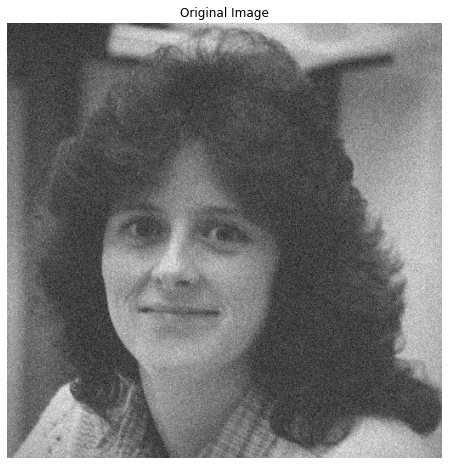

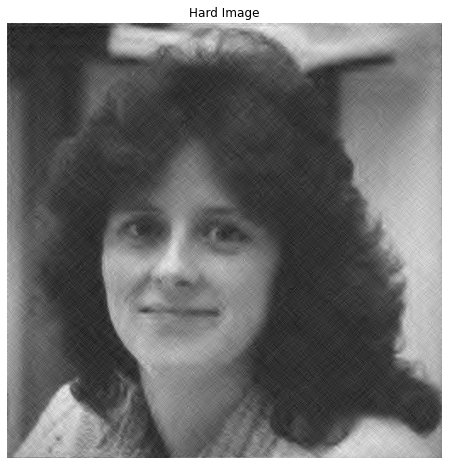

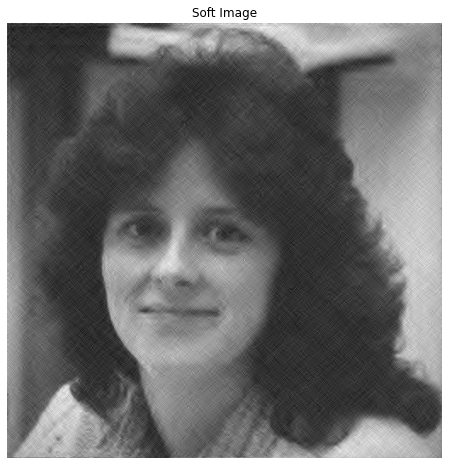

In [33]:
# Clean noisy_darkhair.png via soft and hard thresholding then plot both versions on different subplots.
darkhair = imread('noisy_darkhair.png')
lw = pywt.wavedec2(darkhair, 'db4', mode = 'per',level = 4)   #take the wavedec of the 2d arrays
hard = hard_threshold(lw,40)                     #take the hard threshold
soft = soft_threshold(lw,20)                     #take the soft threshold
inverse = pywt.waverec2(hard, 'db4', mode= 'per')          #take the inverse with the hard
inverse2 = pywt.waverec2(soft, 'db4', mode = 'per')        #take the inverse with the soft
plt.imshow(darkhair, cmap = 'gray')                     #plot the original image
plt.axis('off')
plt.title("Original Image")
plt.show()

plt.imshow(inverse, cmap = 'gray')                      #plot the hard image
plt.axis('off')
plt.title("Hard Image")
plt.show()

plt.imshow(inverse2, cmap = 'gray')                     #plot the soft image
plt.axis('off')
plt.title("Soft Image")
plt.show()